EcoForest 0.8

> **0.7的精华版，0.8是一个里程碑，将在其基础上做最后的修改**

- 数据地址：UCI
  - Letter: https://archive.ics.uci.edu/ml/datasets/letter+recognition
- 数据特点：
  - 非常不均衡、缺失值严重、二分类
- 包含内容：
  1. 数据获取
  2. 模型应用
  3. 结果分析

In [1]:
import os
import numpy as np
import pandas as pd
import time
import os.path as osp

# Stage-1：获取数据

In [2]:
import DataHelper
import importlib
from collections import Counter
importlib.reload(DataHelper)

<module 'DataHelper' from 'C:\\Users\\dxeec\\Desktop\\EcoForest-master\\DataHelper.py'>

In [3]:
# X_train,y_train, X_sub, y_sub = DataHelper.get_driver_data()
# X_train,y_train, X_sub, y_sub = DataHelper.get_yeast_data()

In [4]:
# X_train,y_train, X_sub, y_sub = DataHelper.get_letter_data()
X_train,y_train, X_sub, y_sub = DataHelper.get_yeast_data()

X.shape: (1038, 8) y.shape: (1038,)
X.shape: (446, 8) y.shape: (446,)


C:\Users\dxeec\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
Counter(y_train)

Counter({0: 324,
         2: 171,
         3: 114,
         1: 300,
         5: 31,
         6: 24,
         4: 36,
         8: 14,
         7: 21,
         9: 3})

In [6]:
type(y_train)

numpy.ndarray

In [7]:
Counter(y_sub)

Counter({1: 129, 0: 139, 3: 49, 2: 73, 8: 6, 5: 13, 6: 11, 4: 15, 7: 9, 9: 2})

# Stage-2：模型应用

In [8]:
import ModelUtils
import importlib
from collections import Counter
importlib.reload(ModelUtils)
np.set_printoptions(threshold=np.inf)

In [9]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)

# DT, RF, GDBT, XGB 算法

In [10]:
ModelUtils.decision_tree(X_train, y_train, X_sub, y_sub, feval=acc_metrix_mult)

train ('acc', 1.0)
test ('acc', 0.5089686098654709)


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 array([0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 3, 3, 1, 6, 1, 2, 8, 1, 2, 2,
        1, 5, 3, 6, 1, 2, 0, 8, 0, 2, 1, 2, 1, 0, 4, 0, 2, 2, 2, 0, 2, 1,
        1, 1, 1, 0, 0, 0, 3, 6, 0, 5, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 3,
        2, 2, 1, 1, 0, 2, 0, 5, 2, 3, 3, 2, 5, 3, 2, 2, 0, 1, 2, 0, 0, 3,
        7, 5, 0, 0, 5, 0, 4, 3, 6, 0, 1, 6, 1, 1, 0, 0, 2, 0, 3, 0, 0, 2,
        1, 0, 4, 0, 0, 0, 1, 7, 0, 2, 1, 8, 2, 1, 1, 3, 1, 1, 0, 6, 2, 2,
        1, 2, 1, 0, 1, 0, 8, 1, 5, 1, 1, 0, 2, 2, 1, 7, 1, 1, 3, 1, 0, 2,
        0, 3, 0, 1, 7, 4, 6, 1, 0, 1, 0, 2, 0, 1, 0, 0, 7, 0, 0, 7, 3, 1,
        0, 2, 3, 2, 1, 0, 7, 1, 8, 1, 0, 2, 2, 2, 1

In [11]:
ModelUtils.random_forest(X_train, y_train, X_sub, y_sub, n_estimators=200, feval=acc_metrix_mult)

start train: 2019-08-22 11:33:21.021806
start test: 2019-08-22 11:33:21.285555
end test: 2019-08-22 11:33:21.390698
test ('acc', 0.6165919282511211)
train ('acc', 1.0)


(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 0, 8, 0, 2, 2,
        1, 5, 3, 6, 0, 2, 0, 1, 1, 3, 1, 2, 1, 1, 4, 0, 3, 2, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 3, 0, 0, 5, 1, 0, 2, 0, 3, 0, 1, 1, 1, 2, 0, 3,
        2, 2, 2, 1, 0, 2, 1, 5, 2, 3, 3, 2, 6, 3, 1, 3, 0, 0, 3, 2, 1, 3,
        0, 5, 1, 0, 5, 0, 3, 3, 0, 0, 1, 6, 1, 0, 1, 0, 2, 0, 3, 0, 1, 2,
        1, 0, 4, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 2, 1, 3,
        1, 2, 0, 0, 0, 0, 8, 1, 6, 1, 0, 0, 2, 2, 1, 0, 1, 1, 3, 1, 0, 2,
        0, 3, 0, 1, 2, 1, 6, 1, 1, 0, 1, 2, 0, 1, 0

【实验1】Yeast在RF的结果。

In [12]:
ModelUtils.gdbt_model(X_train, y_train, X_sub, y_sub, n_estimators=200, feval=acc_metrix_mult)

train ('acc', 0.9585741811175337)
test ('acc', 0.5964125560538116)


(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=200,
               n_iter_no_change=None, presort='auto', random_state=None,
               subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 array([1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 0, 1, 0, 0, 0, 2, 2,
        1, 5, 3, 6, 0, 2, 0, 0, 1, 3, 1, 2, 8, 1, 5, 1, 3, 2, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 3, 0, 0, 5, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 3,
        0, 1, 2, 1, 0, 2, 1, 5, 2, 3, 3, 2, 5, 3, 1, 1, 0, 0, 3, 2, 1, 3,
        2, 5, 0, 0, 5, 0, 3, 3, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 3, 0, 1, 2,
        1, 0, 4, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3, 1, 0, 1, 6, 1, 2,
 

【实验1】Yeast在GDBT上的结果。

In [13]:
ModelUtils.xgb_model(X_train, y_train, X_sub, y_sub, num_class=10, feval=acc_metrix_mult)

{'objective': 'binary:logistic'}
before train


XGBoostError: [11:33:31] C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:101: label must be in [0,1] for logistic regression

【实验？】原文章没有提到xgboost

# BaseLine

In [ ]:
ModelUtils.baseline_1_flod(X_train, y_train, X_sub, y_sub, num_class=10, feval=acc_metrix_mult)

【实验1】DBRF的结果？是哪种情况的？

    【原结果】
    cross_score: 0.53989
    test score ('acc', 0.63228699551569512)
    train kflod pred: ('acc', 0.63228699551569512)
    train pred ('acc', 1.0) 【为什么train差这么多？？？】
    test pred ('acc', 0.63228699551569512)

In [ ]:
ModelUtils.baseline_model(X_train, y_train, X_sub, y_sub, num_class=10, feval=acc_metrix_mult)

# Stage-3：EcoForest

In [14]:
import EnhancedForest_multiclass
import EnhancedForest_producer
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(EnhancedForest_producer)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings('ignore')

In [15]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_sub, y_sub, num_class=10, flag="yeast", isLRStacker=True)
decoForest.set_parameter(criterion="entropy", dropout=0.8, min_samples_leaf=1)
decoForest.fit(n_estimators=200, kfold=2, feval=acc_metrix_mult)


2019-08-22 11:33:44 layer: 1
all data ('acc', 0.8757225433526011)
train loss ('acc', 0.8757225433526011)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.5809248554913294)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.625560538116592)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2019-08-22 11:33:46 layer: 2
all data ('acc', 0.8728323699421965)
[p:11/1:1|n:1027/1:299] 
train loss ('acc', 0.8728323699421965)
pass train loss ('acc', 0.9090909090909091)
pass train loss now ('acc', 0.9090909090909091)
vaild loss ('acc', 0.5780346820809249)
pass vaild loss ('acc', 0.8181818181818182)
pass vaild loss now ('acc', 0.8181818181818182)
test loss ('acc', 0.625560538116592)
pass test loss ('acc', 0.9090909090909091)
pass test loss now ('acc', 0.9090909090909091)
not pass

2019-08-22 11:33:48 layer: 3
all data ('acc', 0.8892100192678227)
[p:12/1:1|n:1026/1:299] 
train loss ('acc', 0.8892100192678227)
pass train loss ('acc', 0.833333333

all data ('acc', 0.866869918699187)
[p:13/1:2|n:971/1:284] 
train loss ('acc', 0.8680154142581888)
pass train loss ('acc', 0.8507462686567164)
pass train loss now ('acc', 0.6923076923076923)
vaild loss ('acc', 0.5732177263969171)
pass vaild loss ('acc', 0.5671641791044776)
pass vaild loss now ('acc', 0.6923076923076923)
test loss ('acc', 0.6165919282511211)
pass test loss ('acc', 0.7096774193548387)
pass test loss now ('acc', 0.6666666666666666)
19 [p:6/np:415] 

2019-08-22 11:34:30 layer: 20
all data ('acc', 0.8836251287332647)
[p:11/1:3|n:960/1:281] 
train loss ('acc', 0.8815028901734104)
pass train loss ('acc', 0.8589743589743589)
pass train loss now ('acc', 0.9090909090909091)
vaild loss ('acc', 0.5684007707129094)
pass vaild loss ('acc', 0.5769230769230769)
pass vaild loss now ('acc', 0.6363636363636364)
test loss ('acc', 0.6345291479820628)
pass test loss ('acc', 0.6666666666666666)
pass test loss now ('acc', 0.4)
20 [p:5/np:410] 

2019-08-22 11:34:33 layer: 21
all data ('acc', 0

all data ('acc', 0.8738738738738738)
[p:16/1:7|n:872/1:263] 
train loss ('acc', 0.8786127167630058)
pass train loss ('acc', 0.9096385542168675)
pass train loss now ('acc', 0.9375)
vaild loss ('acc', 0.5568400770712909)
pass vaild loss ('acc', 0.6325301204819277)
pass vaild loss now ('acc', 0.5)
test loss ('acc', 0.625560538116592)
pass test loss ('acc', 0.676923076923077)
pass test loss now ('acc', 0.5)
not pass

2019-08-22 11:35:36 layer: 38
all data ('acc', 0.8783783783783784)
[p:10/1:4|n:878/1:266] 
train loss ('acc', 0.882466281310212)
pass train loss ('acc', 0.9125)
pass train loss now ('acc', 1.0)
vaild loss ('acc', 0.5578034682080925)
pass vaild loss ('acc', 0.625)
pass vaild loss now ('acc', 0.3)
test loss ('acc', 0.6210762331838565)
pass test loss ('acc', 0.7049180327868853)
pass test loss now ('acc', 0.75)
not pass

2019-08-22 11:35:41 layer: 39
all data ('acc', 0.8783783783783784)
[p:17/1:7|n:871/1:263] 
train loss ('acc', 0.882466281310212)
pass train loss ('acc', 0.9101796

all data ('acc', 0.8648648648648649)
[p:13/1:6|n:875/1:264] 
train loss ('acc', 0.8709055876685935)
pass train loss ('acc', 0.8957055214723927)
pass train loss now ('acc', 0.7692307692307693)
vaild loss ('acc', 0.5626204238921002)
pass vaild loss ('acc', 0.6257668711656442)
pass vaild loss now ('acc', 0.38461538461538464)
test loss ('acc', 0.6165919282511211)
pass test loss ('acc', 0.6461538461538462)
pass test loss now ('acc', 0.25)
not pass

2019-08-22 11:37:09 layer: 56
all data ('acc', 0.8738738738738738)
[p:13/1:4|n:875/1:266] 
train loss ('acc', 0.8786127167630058)
pass train loss ('acc', 0.901840490797546)
pass train loss now ('acc', 0.8461538461538461)
vaild loss ('acc', 0.5674373795761078)
pass vaild loss ('acc', 0.6257668711656442)
pass vaild loss now ('acc', 0.38461538461538464)
test loss ('acc', 0.6188340807174888)
pass test loss ('acc', 0.6507936507936508)
pass test loss now ('acc', 0.16666666666666666)
not pass

2019-08-22 11:37:14 layer: 57
all data ('acc', 0.87274774774

all data ('acc', 0.8772522522522522)
[p:9/1:3|n:879/1:267] 
train loss ('acc', 0.8815028901734104)
pass train loss ('acc', 0.89937106918239)
pass train loss now ('acc', 0.7777777777777778)
vaild loss ('acc', 0.5568400770712909)
pass vaild loss ('acc', 0.6352201257861635)
pass vaild loss now ('acc', 0.4444444444444444)
test loss ('acc', 0.6165919282511211)
pass test loss ('acc', 0.6721311475409836)
pass test loss now ('acc', 0.25)
not pass

2019-08-22 11:39:04 layer: 74
all data ('acc', 0.8693693693693694)
[p:21/1:9|n:867/1:261] 
train loss ('acc', 0.8747591522157996)
pass train loss ('acc', 0.9064327485380117)
pass train loss now ('acc', 0.9047619047619048)
vaild loss ('acc', 0.5626204238921002)
pass vaild loss ('acc', 0.6023391812865497)
pass vaild loss now ('acc', 0.2857142857142857)
test loss ('acc', 0.6278026905829597)
pass test loss ('acc', 0.711864406779661)
pass test loss now ('acc', 1.0)
not pass

2019-08-22 11:39:12 layer: 75
all data ('acc', 0.8817567567567568)
[p:17/1:8|n:87

all data ('acc', 0.8704954954954955)
[p:10/1:4|n:878/1:266] 
train loss ('acc', 0.8757225433526011)
pass train loss ('acc', 0.8875)
pass train loss now ('acc', 0.6)
vaild loss ('acc', 0.5635838150289018)
pass vaild loss ('acc', 0.63125)
pass vaild loss now ('acc', 0.4)
test loss ('acc', 0.6210762331838565)
pass test loss ('acc', 0.6507936507936508)
pass test loss now ('acc', 0.16666666666666666)
not pass

2019-08-22 11:41:24 layer: 92
all data ('acc', 0.865990990990991)
[p:11/1:5|n:877/1:265] 
train loss ('acc', 0.871868978805395)
pass train loss ('acc', 0.9130434782608695)
pass train loss now ('acc', 1.0)
vaild loss ('acc', 0.5655105973025049)
pass vaild loss ('acc', 0.6273291925465838)
pass vaild loss now ('acc', 0.36363636363636365)
test loss ('acc', 0.6345291479820628)
pass test loss ('acc', 0.6911764705882353)
pass test loss now ('acc', 0.6363636363636364)
not pass

2019-08-22 11:41:33 layer: 93
all data ('acc', 0.8795045045045045)
[p:9/1:3|n:879/1:267] 
train loss ('acc', 0.88342

In [16]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.6390134529147982,
 [(0, 0.625560538116592),
  (1, 0.6390134529147982),
  (2, 0.6300448430493274),
  (3, 0.6390134529147982),
  (4, 0.6278026905829597),
  (5, 0.6165919282511211),
  (6, 0.6345291479820628),
  (7, 0.6300448430493274),
  (8, 0.6233183856502242),
  (9, 0.625560538116592),
  (10, 0.6121076233183856)])

In [18]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.6390134529147982,
 [(0, 0.625560538116592),
  (1, 0.6390134529147982),
  (2, 0.6300448430493274),
  (3, 0.6390134529147982),
  (4, 0.6278026905829597),
  (5, 0.6165919282511211),
  (6, 0.6345291479820628),
  (7, 0.6300448430493274),
  (8, 0.6233183856502242),
  (9, 0.625560538116592),
  (10, 0.6121076233183856)])

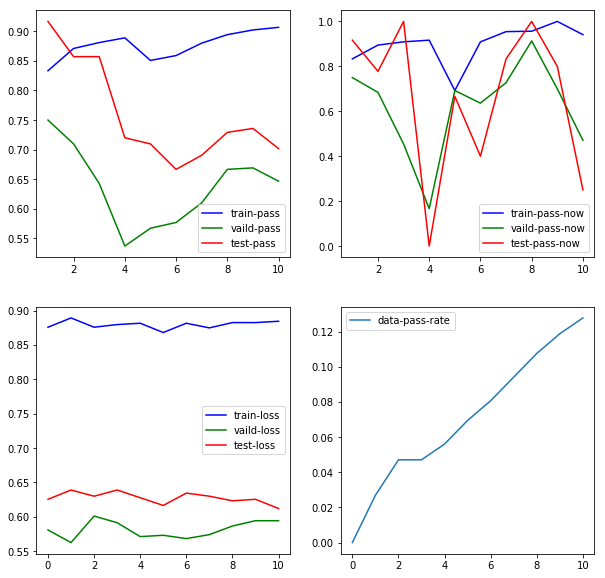

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [ ]:
import DecomposerForest
import importlib
importlib.reload(DecomposerForest)

In [ ]:
np.seterr(divide='ignore', invalid='ignore')

In [ ]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_sub, y_sub, True, 10)
decoForest.fit(200, 20, acc_metrix_mult)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

# Todo list
- 树结构设计（完成）
- 通过gini对数据分割（完成）
- 全局测试集
- 输出结果集
- 打印信息增加pass data的比例
- 防止过拟合
- 对pass data的进一步处理
- 先进行数据均衡化是不是更快一些